In [1]:
# Standard imports
import quandl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly for better graphs
import plotly.offline as plotly
import plotly.graph_objs as go

plotly.init_notebook_mode(connected=True)

#using quandl API to retrieve tables

In [2]:
quandl.ApiConfig.api_key = 'w76xpBD9bkzHA_uJcrxP'
indicator_filter=quandl.get_table('ZILLOW/INDICATORS',paginate=True )
region_filter=quandl.get_table('ZILLOW/REGIONS',paginate=True )

Converting the tables to dataframes

In [3]:
indicators=pd.DataFrame(indicator_filter)
regions=pd.DataFrame(region_filter)
regions.set_index('region_id')
indicators.index=indicators['indicator_id']

In [4]:
#EastBayCities
east_bay_cities = ['Berkeley; CA','Oakland; CA', 'Emeryville; CA', 'Dublin; CA', 'San Ramon; CA', 'Fremont; CA','San Jose; CA','San Francisco; CA']

#creating dict for plotting data with these indicators, to see how the homeprices changed pre and post pandemic

codes = dict(ZSFH=indicators.loc['ZSFH']['indicator'],
             ZCON=indicators.loc['ZCON']['indicator'],
             ZATT=indicators.loc['ZATT']['indicator'],
             ZALL=indicators.loc['ZALL']['indicator'])

In [5]:
#SouthBay cities
south_bay_ids=[13713,54626,33839,39511,11604,4281,20330]

south_bay_cities = ['Santa Clara; CA','Sunnyvale; CA', 'San Jose; CA', 'Los Altos; CA','Gilroy; CA','Cupertino; CA','San Francisco; CA']
south_bay_dict=dict(zip(south_bay_ids,south_bay_cities))


#creating dict for plotting data with these indicators, to see how the homeprices changed pre and post pandemic

home_codes = dict(ZSFH=indicators.loc['ZSFH']['indicator'],
             ZCON=indicators.loc['ZCON']['indicator'],
             ZATT=indicators.loc['ZATT']['indicator'],
             ZALL=indicators.loc['ZALL']['indicator'])

In [6]:
# data=quandl.get_table('ZILLOW/DATA', indicator_id='ZCON', region_id='51751',paginate=True )
#testing table data

Filtering the regions table to get the East Bay cities and codes

In [7]:
regions = regions.loc[(regions['region'].str.contains('|'.join(east_bay_cities))) &(regions['region_type'] == 'city') ]

In [8]:
cities_df=regions.copy()
cities_df.index = cities_df['region_id']

Data cleaning

In [9]:
cities_df=cities_df.drop(['region_id','region_type'], axis=1)

In [10]:
# cities_dict=cities_df.to_dict(orient='index')
city_id=[51751,4582,20337,16992,13072,11540]
city=['Dublin, CA','Emeryville, CA','San Ramon, CA','Berkeley, CA','Oakland, CA',   'Fremont, CA']



cities_dict=dict(zip(city_id,city))
cities_dict

{51751: 'Dublin, CA',
 4582: 'Emeryville, CA',
 20337: 'San Ramon, CA',
 16992: 'Berkeley, CA',
 13072: 'Oakland, CA',
 11540: 'Fremont, CA'}

get one indicator for multiple cities


In [11]:

def get_city_data(cities, indicator):
    df_array=[]
    for city_id, city in cities.items():
        data=quandl.get_table('ZILLOW/DATA', indicator_id={indicator}, region_id={city_id},paginate=True )
        try:
            data.rename(index=str, columns={'value': city}, inplace=True)

            df_array.append(data)
        except:
            print('Could not fetch for:', city)
    ret = pd.concat(df_array, axis=1)

    return ret

Get Multiple Indicators for One city

In [12]:

def get_indicator_data(city_id, indicators):
    df_array = []
    for code, name in indicators.items():
        data=quandl.get_table('ZILLOW/DATA', indicator_id={code}, region_id={city_id},paginate=True )
        data.rename(index=str, columns={'value': name}, inplace=True)
        df_array.append(data)
    ret = pd.concat(df_array, axis=1)
    return ret

simple plot function

In [13]:
# Translate DataFrame into Plotly Scatter Plot
def plot_df(dataframe, title): 
    data = [go.Scatter(x=dataframe.index,
                                  y=dataframe[column],
                                  name=column) for column in dataframe.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    return fig

#function to clean data

In [14]:
def clean_data(dataframe):
    dataframe=dataframe.T.drop_duplicates(keep='first').T
    filter1=dataframe.filter(like='region_id')
    filter2=dataframe.filter(like='indicator_id')
    dataframe.drop(columns=filter1 ,inplace=True)
    dataframe.drop(columns=filter2 ,inplace=True)
    dataframe.set_index("date",drop=True,inplace=True)
    return dataframe


#East Bay- Avg Home Price Plot

In [15]:
east_bay_homes=get_city_data(cities_dict,'ZALL')
east_bay_homes=clean_data(east_bay_homes)

In [16]:
east_bay_homes

,"Dublin, CA","Emeryville, CA","San Ramon, CA","Berkeley, CA","Oakland, CA","Fremont, CA"
date,,,,,,
2021-07-31,1222013.0,621657.0,1634531.0,1604446.0,959760.0,1387180.0
2021-06-30,1181174.0,615433.0,1579672.0,1572920.0,941369.0,1349356.0
2021-05-31,1138129.0,607211.0,1525180.0,1535306.0,918667.0,1307023.0
2021-04-30,1095450.0,590577.0,1467679.0,1483260.0,888518.0,1261329.0
2021-03-31,1060632.0,583304.0,1430757.0,1446885.0,866640.0,1226019.0
...,...,...,...,...,...,...
1996-05-31,242311.0,144711.0,403047.0,236058.0,155810.0,221342.0
1996-04-30,242173.0,145650.0,409951.0,236296.0,155957.0,221144.0
1996-03-31,242434.0,146964.0,416214.0,236709.0,156541.0,221400.0


In [17]:
plot1=east_bay_homes.loc[:'2016']

In [18]:
fig=plot_df(plot1,'East Bay Average cost- All Homes')
plotly.iplot(fig)

Plots for San Ramon, Berkeley, San francisco, Los altos, Cupertino

In [19]:
compare_metros=get_city_data({20337: 'San Ramon, CA',
                              16992: 'Berkeley',
                              39511: 'Los Altos, CA',
                              4281: 'Cupertino, CA',
                              20330: 'San Francisco, CA'},'ZATT')
compare_metros=clean_data(compare_metros)
compare_metros

,"San Ramon, CA",Berkeley,"Los Altos, CA","Cupertino, CA","San Francisco, CA"
date,,,,,
2021-07-31,2217375.0,2219383.0,4545723.0,3179397.0,2182021.0
2021-06-30,2149779.0,2182503.0,4445846.0,3113204.0,2140055.0
2021-05-31,2080254.0,2132726.0,4310174.0,3024952.0,2109929.0
2021-04-30,1989124.0,2036240.0,4126917.0,2921431.0,2101887.0
2021-03-31,1942027.0,1984529.0,4064288.0,2874395.0,2090905.0
...,...,...,...,...,...
1996-05-31,517692.0,267517.0,954503.0,593957.0,521685.0
1996-04-30,522847.0,268285.0,955099.0,593520.0,523087.0
1996-03-31,529028.0,269225.0,957841.0,594312.0,525072.0


In [20]:
compare_metros = compare_metros.loc[:'2016']

figr=plot_df(compare_metros,'Comparison of Avg sale price of Big5 citiees in Bay area')
plotly.iplot(figr, filename='Seasonal Trend Analysis', show_link=False)

# plotting rentals

In [21]:
df = pd.read_csv("C:/Users\ShanmukhBehara\Downloads\Metro_ZORI_AllHomesPlusMultifamily_Smoothed.csv")
df=df.drop(['SizeRank','RegionID'],axis=1)

In [22]:
df=df.T

In [23]:
df.rename(index={"RegionName":"date"},inplace=True)

In [24]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

In [25]:
new_df=df[['San Francisco, CA','San Jose, CA','Los Angeles-Long Beach-Anaheim, CA','United States']]

In [26]:
figr=plot_df(new_df,'Rental Plot-Top Metros in CA Vs National Average')
plotly.iplot(figr)

#South Bay Plots

In [27]:
southbay_df=get_city_data(south_bay_dict,'ZALL')
southbay_df=clean_data(southbay_df)
southbay_df

,Santa Clara; CA,Sunnyvale; CA,San Jose; CA,Los Altos; CA,Gilroy; CA,Cupertino; CA,San Francisco; CA
date,,,,,,,
2021-07-31,1515249.0,1914532.0,1286076.0,3843186.0,955821.0,2613904.0,1502029.0
2021-06-30,1482497.0,1871746.0,1252385.0,3749413.0,931007.0,2550214.0,1472176.0
2021-05-31,1441362.0,1818014.0,1210891.0,3625433.0,900993.0,2469581.0,1450463.0
2021-04-30,1413671.0,1774358.0,1170120.0,3474538.0,870504.0,2375856.0,1443210.0
2021-03-31,1396135.0,1749119.0,1147866.0,3413477.0,854032.0,2333143.0,1435694.0
...,...,...,...,...,...,...,...
1996-05-31,236112.0,285955.0,205634.0,662691.0,212638.0,397864.0,299319.0
1996-04-30,235946.0,285423.0,205528.0,662956.0,214062.0,397035.0,300158.0
1996-03-31,236175.0,285429.0,205820.0,665088.0,214828.0,397023.0,301324.0


In [28]:
southbay_df=southbay_df.loc[:'2014']
figr=plot_df(southbay_df,'South Bay and San Francisco Average cost- All Homes')
plotly.iplot(figr)

# SUBPLOTING THE CITIES OF SOUTH WAY TO CHECK THE TREND OF THERE AVERAGE PRICE.


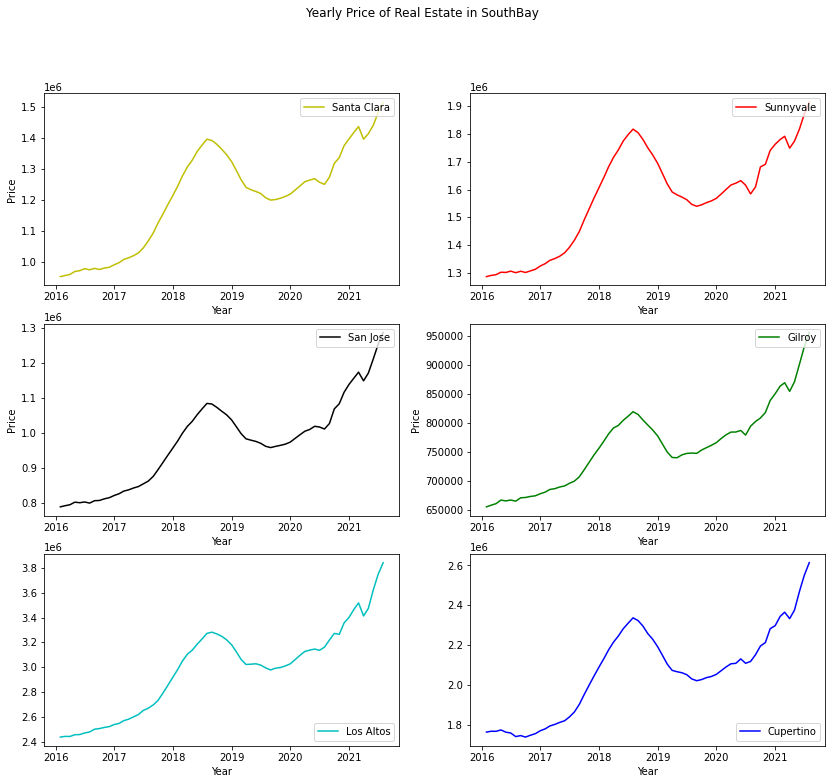

In [29]:

fig, ax = plt.subplots(3, 2, figsize=(14, 12))

ax[0, 0].plot(southbay_df.loc[:'2016', 'Santa Clara; CA'], 'y-', label='Santa Clara')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('Price')
ax[0, 0].legend(loc="upper right")

ax[0, 1].plot(southbay_df.loc[:'2016', 'Sunnyvale; CA'], 'r-', label='Sunnyvale')
ax[0, 1].set_xlabel('Year')
ax[0, 1].legend(loc="upper right")

ax[1, 0].plot(southbay_df.loc[:'2016', 'San Jose; CA'], 'k-', label='San Jose')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('Price')
ax[1, 0].legend(loc="upper right")

ax[1, 1].plot(southbay_df.loc[:'2016', 'Gilroy; CA'], 'g-', label='Gilroy')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('Price')
ax[1, 1].legend(loc="upper right")

ax[2, 0].plot(southbay_df.loc[:'2016', 'Los Altos; CA'], 'c-', label='Los Altos')
ax[2, 0].set_xlabel('Year')
ax[2, 0].legend(loc="lower right")

ax[2, 1].plot(southbay_df.loc[:'2016', 'Cupertino; CA'], 'b-', label='Cupertino')
ax[2, 1].set_xlabel('Year')
ax[2, 1].legend(loc="lower right")

plt.suptitle('Yearly Price of Real Estate in SouthBay')
plt.show()

## RESEARCH QUESTION: HOW DO THE HOME VALUES CHANGE WITH TIME ACROSS TIERS?


In [30]:
## COMPARING DATA OF THE CITY WITH HIGHEST AND LOWEST PRICES IN THE SOUTH BAY AREA.

cities=['Los Altos; CA','Gilroy; CA','San Francisco; CA']
code = dict(
    ZATT=indicators.loc['ZATT']['indicator'],
    ZALL=indicators.loc['ZALL']['indicator'],
    ZABT=indicators.loc['ZABT']['indicator'])

In [31]:
LA=get_indicator_data(39511,code)
LA=clean_data(LA)

In [32]:
plot1=LA.loc[:'2016']
figr=plot_df(plot1,'Variation of Mean Value of Houses by Tier Type in Los Altos')
plotly.iplot(figr)

In [33]:
SF=get_indicator_data(20330,code)
SF=clean_data(SF)


In [34]:
plot1=SF.loc[:'2016']
figr=plot_df(plot1,'Variation of Mean Value of Houses by Tier Type in San Francisco')
plotly.iplot(figr)

In [35]:
median_rentals=new_df[['San Francisco, CA','San Jose, CA',]]
median_sales=get_city_data({20330:'San Francisco, CA' ,33839: 'San Jose, CA'}, 'ZALL')
median_sales=clean_data(median_sales)
median_sales=median_sales.loc[:'2014']
median_sales=median_sales.sort_index()
median_sales

,"San Francisco, CA","San Jose, CA"
date,,
2014-01-31,968620.0,647369.0
2014-02-28,988657.0,660211.0
2014-03-31,1004064.0,664432.0
2014-04-30,1020493.0,666155.0
2014-05-31,1027539.0,662481.0
...,...,...
2021-03-31,1435694.0,1147866.0
2021-04-30,1443210.0,1170120.0
2021-05-31,1450463.0,1210891.0


In [36]:
median_rentals

date,"San Francisco, CA","San Jose, CA"
2014-01,2207.0,2189.0
2014-02,2130,2208
2014-03,2192.0,2209.0
2014-04,2219,2236
2014-05,2281,2319
...,...,...
2021-04,2914,2939
2021-05,2959.0,2989.0
2021-06,3018,3031
2021-07,3072,3082
